In [ ]:
# Import all required modules
# Disable warnings
import warnings

import numpy as np
import pandas as pd

warnings.filterwarnings("ignore")

# Import plotting modules and set up
import seaborn as sns

sns.set()
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [ ]:
sns.set_context("notebook", font_scale=1.5, rc={"figure.figsize": (11, 8), "axes.titlesize":18})
from matplotlib import rcParams

rcParams["figure.figsize"] = 11, 8

In [ ]:
DATA_PATH = "https://raw.githubusercontent.com/Yorko/mlcourse.ai/main/data/"

In [ ]:
df = pd.read_csv(DATA_PATH + "mlbootcamp5_train.csv", sep=";")
print("Dataset size: ", df.shape)
df.head()

Dataset size:  (70000, 13)


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


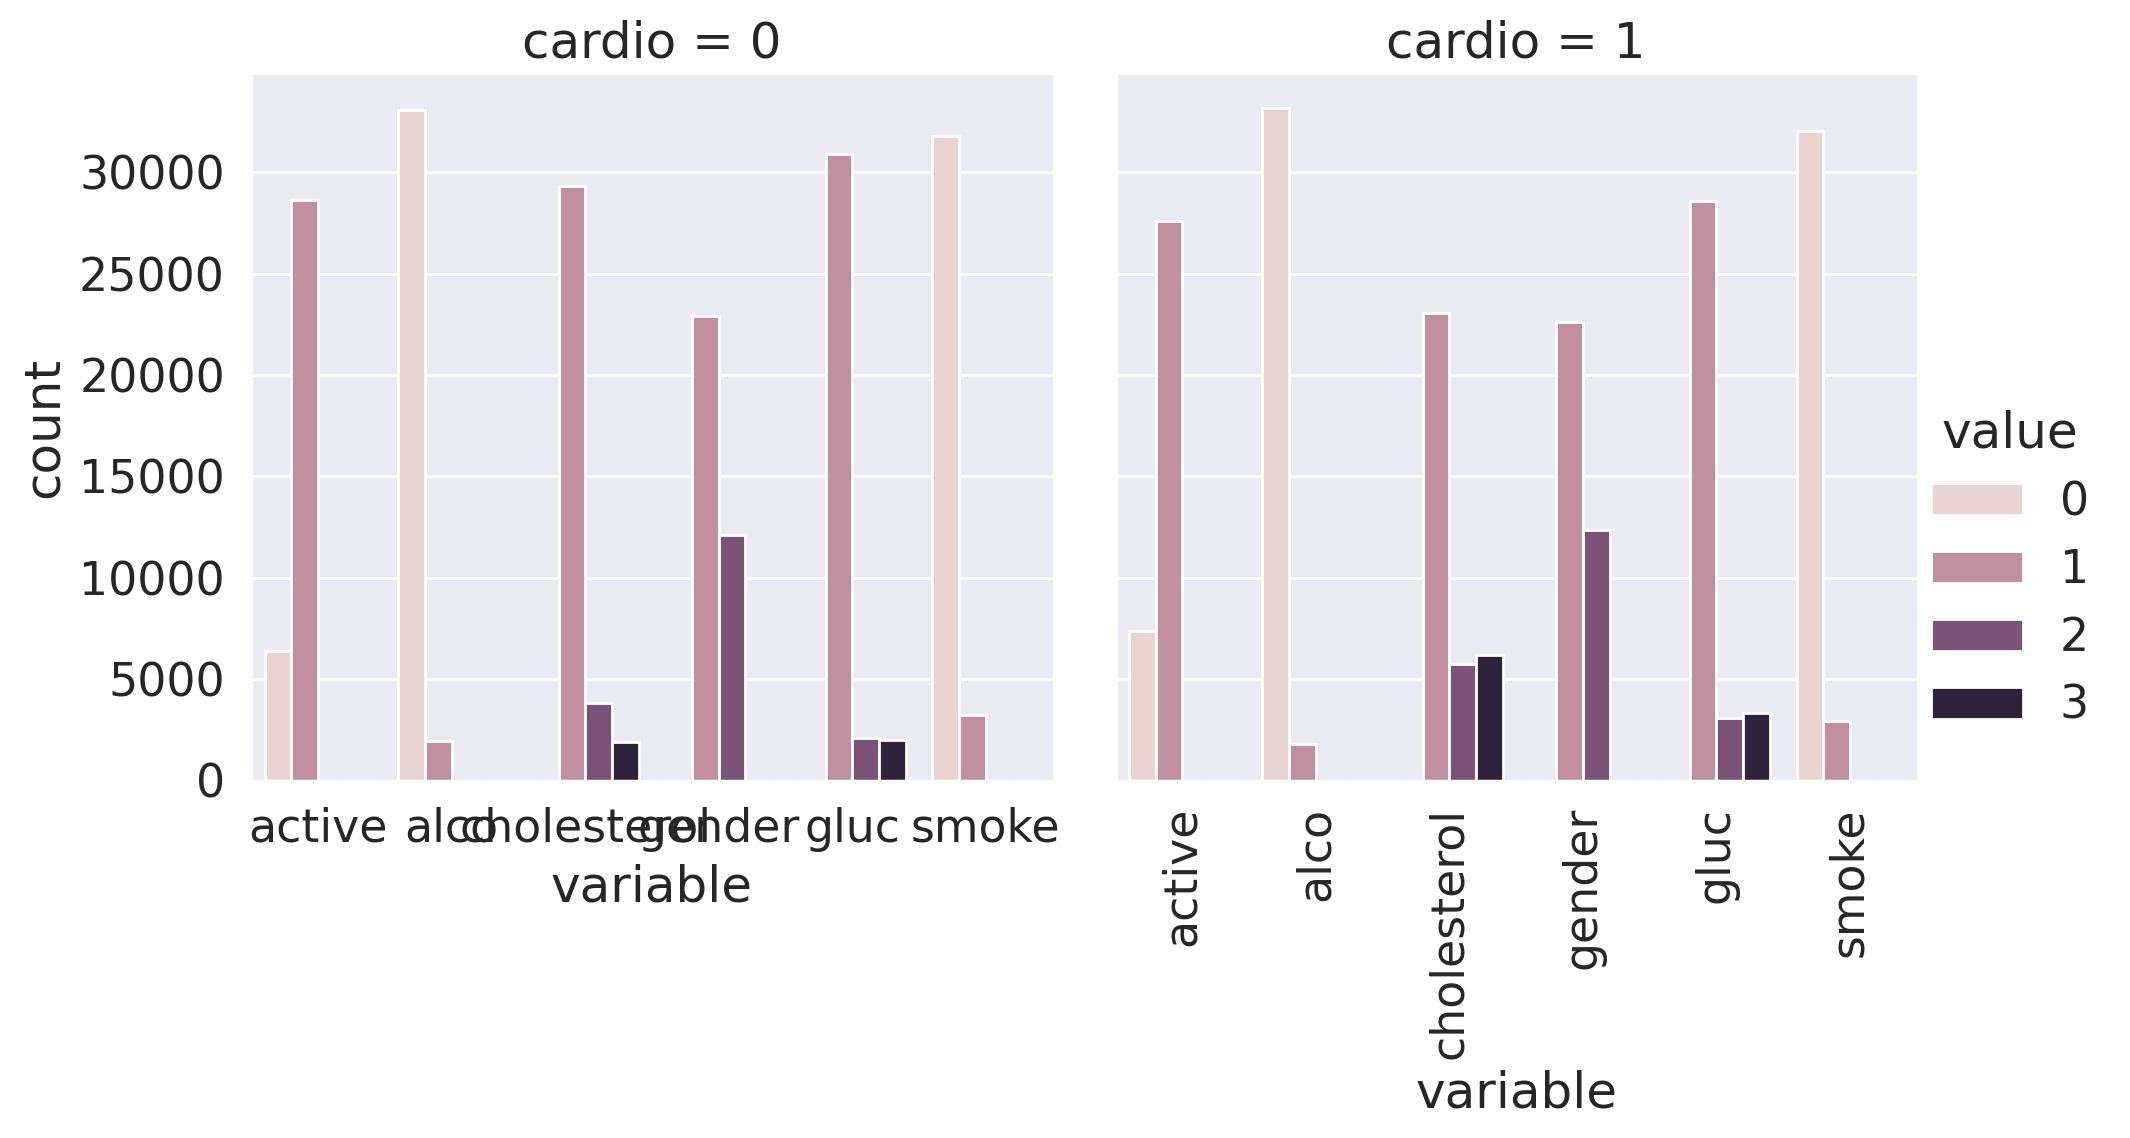

In [ ]:
df_uniques = pd.melt(
    frame=df,
    value_vars=["gender", "cholesterol", "gluc", "smoke", "alco", "active"],
    id_vars=["cardio"],
)
df_uniques = (
    pd.DataFrame(df_uniques.groupby(["variable", "value", "cardio"])["value"].count())
    .sort_index(level=[0, 1])
    .rename(columns={"value": "count"})
    .reset_index()
)
sns.catplot(
    x="variable",
    y="count",
    hue="value",
    col="cardio",
    data=df_uniques,
    kind="bar"
)
plt.xticks(rotation='vertical');

In [ ]:
for c in df.columns:
  n = df[c].nunique()
  print(c)
  if n <= 3:
    print(n, sorted(df[c].value_counts().to_dict().items()))
  else:
    print(n)
  print(10*"=")

id
70000
age
8076
gender
2 [(1, 45530), (2, 24470)]
height
109
weight
287
ap_hi
153
ap_lo
157
cholesterol
3 [(1, 52385), (2, 9549), (3, 8066)]
gluc
3 [(1, 59479), (2, 5190), (3, 5331)]
smoke
2 [(0, 63831), (1, 6169)]
alco
2 [(0, 66236), (1, 3764)]
active
2 [(0, 13739), (1, 56261)]
cardio
2 [(0, 35021), (1, 34979)]


In [ ]:
#Q1.1.1
print(df.groupby("gender")["height"].mean())
df["gender"].value_counts()

gender
1    161.355612
2    169.947895
Name: height, dtype: float64


1    45530
2    24470
Name: gender, dtype: int64

In [ ]:
#Q1.1.2
print(df.groupby("gender")["alco"].mean())

gender
1    0.025500
2    0.106375
Name: alco, dtype: float64


In [ ]:
#Q1.1.3
print(df.groupby("gender")["smoke"].mean())
diff = df.loc[df["gender"]==2, "smoke"].mean() - df.loc[df["gender"]==1, "smoke"].mean()
print(round(100*diff))

gender
1    0.017856
2    0.218880
Name: smoke, dtype: float64
20


In [ ]:
#Q1.1.4
df.groupby("smoke")["age"].median() / 365.25
diff = df[df["smoke"]==0]["age"].median() - df[df["smoke"]==1]["age"].median()
print(diff/365.25*12)

19.613963039014372


In [ ]:
#Q1.2
df["age_years"] = round(df["age"]/365.25).astype("int")
df["age_years"] = (df["age"] / 365.25).round().astype("int")
print(df["age_years"].max())

65


In [ ]:
smoking_old_men = df[(df["age_years"] >= 60) & (df["age_years"] < 65) & (df["gender"]==2) & (df["smoke"]==1)]

In [ ]:
smoking_old_men[(smoking_old_men["cholesterol"]==1) & (smoking_old_men["ap_hi"] < 120)]["cardio"].mean()

0.2631578947368421

In [ ]:
smoking_old_men[(smoking_old_men["cholesterol"]==3) & (smoking_old_men["ap_hi"] >= 160) & (smoking_old_men["ap_hi"] < 180)]["cardio"].mean()

0.8636363636363636

In [ ]:
#Q1.3
df["BMI"] = df["weight"] / (df["height"] / 100)**2
df["BMI"].median()

26.374068120774975

In [ ]:
df.groupby("gender")["BMI"].median()

gender
1    26.709402
2    25.910684
Name: BMI, dtype: float64

In [ ]:
df.groupby(["gender", "alco", "cardio"])["BMI"].median()

gender  alco  cardio
1       0     0         25.654372
              1         27.885187
        1     0         27.885187
              1         30.110991
2       0     0         25.102391
              1         26.674874
        1     0         25.351541
              1         27.530797
Name: BMI, dtype: float64

In [ ]:
#Q1.4
df_r = df[(df["ap_lo"] > df["ap_hi"]) | (df["height"] < df["height"].quantile(0.025)) |
          (df["height"] > df["height"].quantile(0.975)) | (df["weight"] < df["weight"].quantile(0.025))
           | (df["weight"] > df["weight"].quantile(0.975))]

In [ ]:
ans = (df_r.size/df.size)
print(ans)

0.0963


<Axes: >

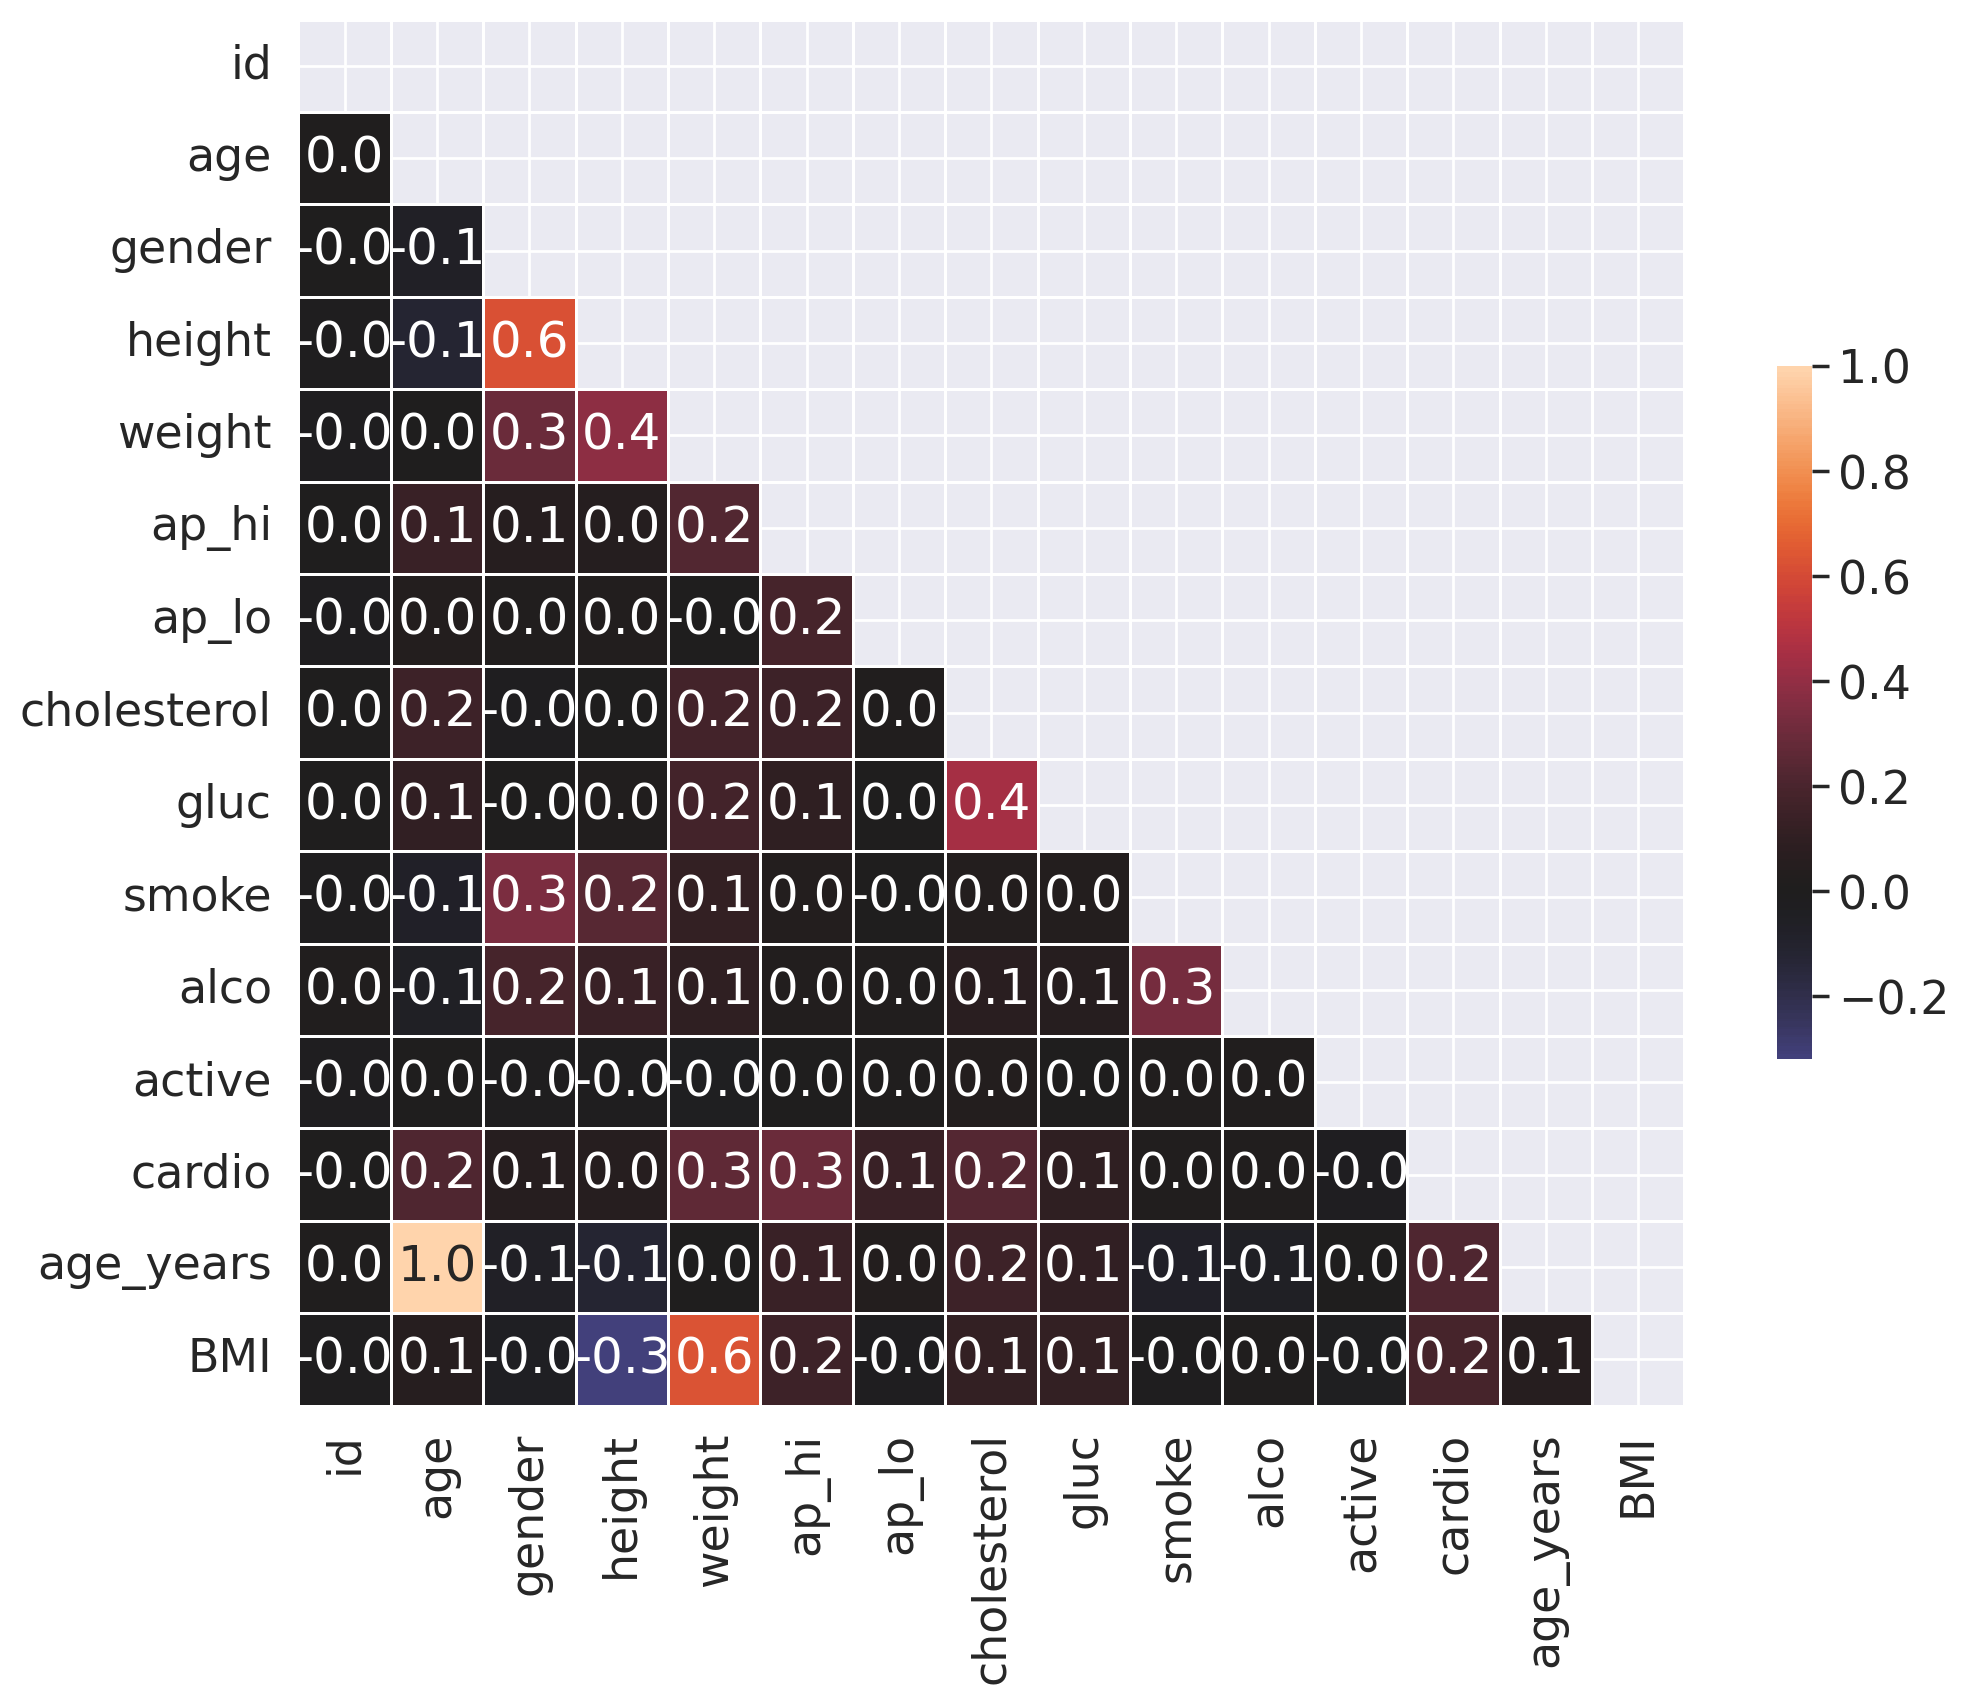

In [ ]:
#Q2.1

df = df_r.copy()
corr = df.corr()
mask = np.zeros_like(corr, dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr, annot=True, fmt=".1f", cbar_kws={"shrink":0.5}, linewidth="0.5", mask=mask, vmax=1, center=0, square=True)

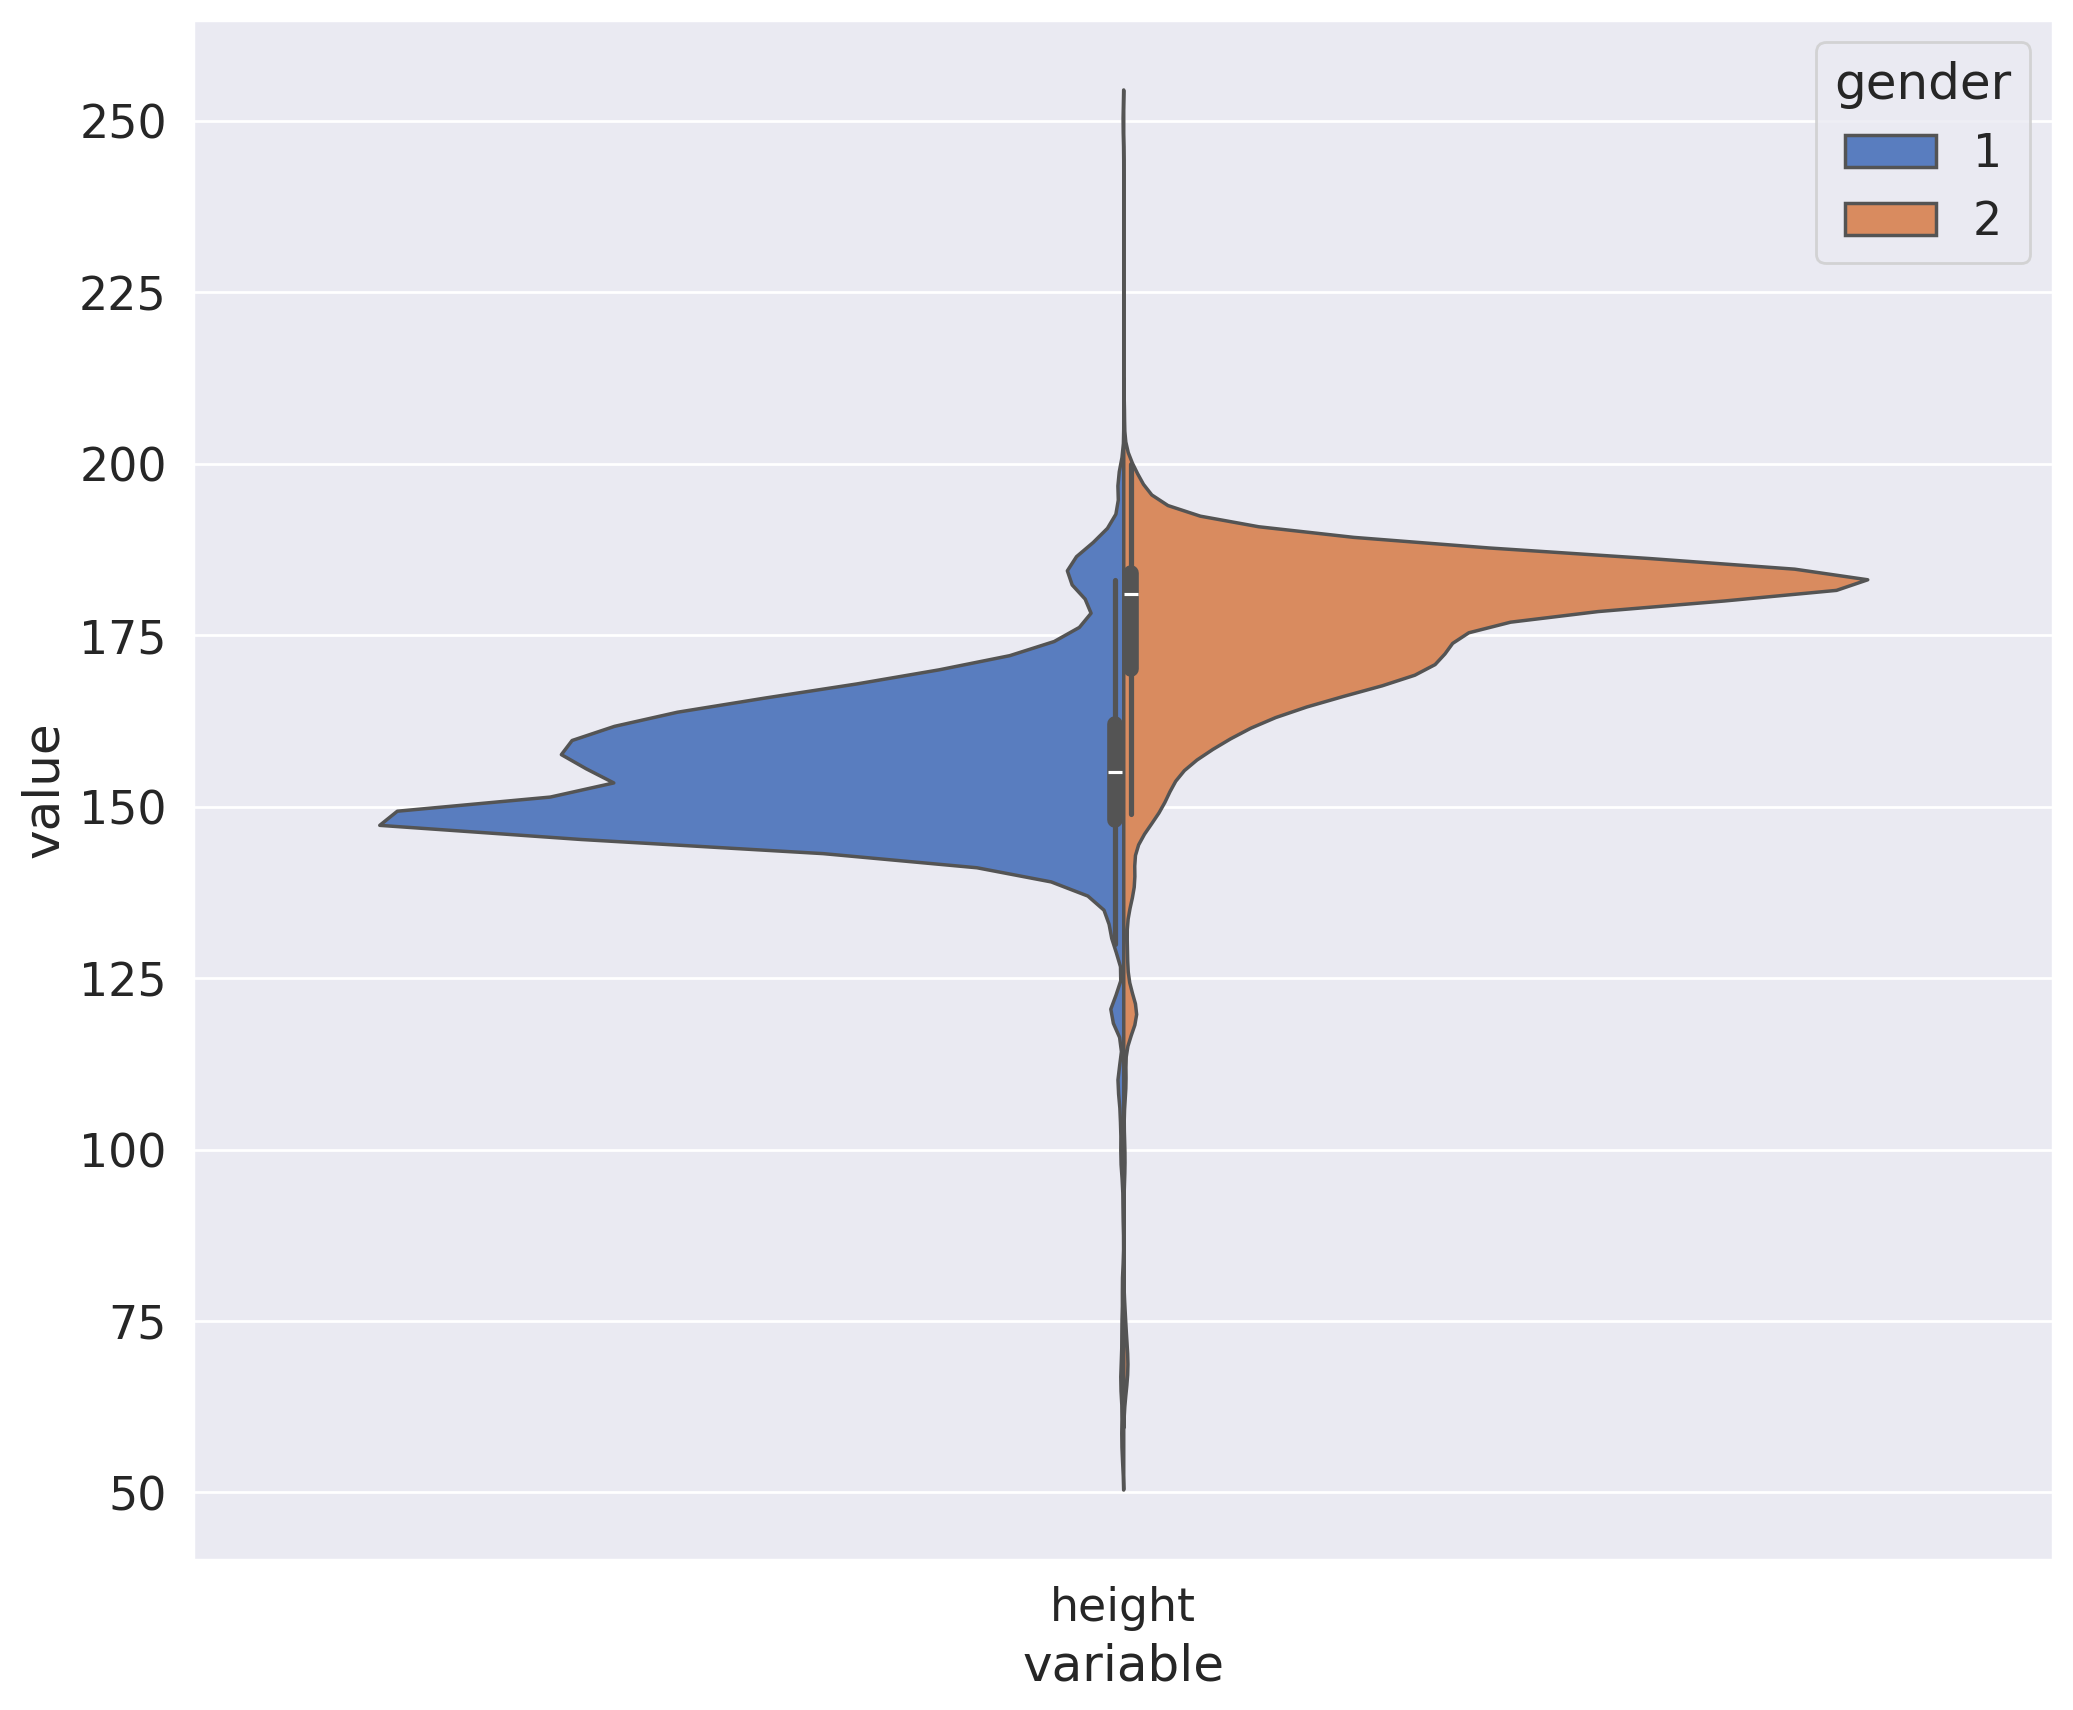

In [ ]:
#Q2.2
df_melt = pd.melt(frame=df, value_vars=["height"], id_vars=["gender"])
plt.figure(figsize=(12, 10))
ax = sns.violinplot(
    x="variable",
    y="value",
    hue="gender",
    palette="muted",
    split=True,
    data=df_melt,
    scale="count",
    scale_hue=False
)

<Axes: xlabel='value', ylabel='Density'>

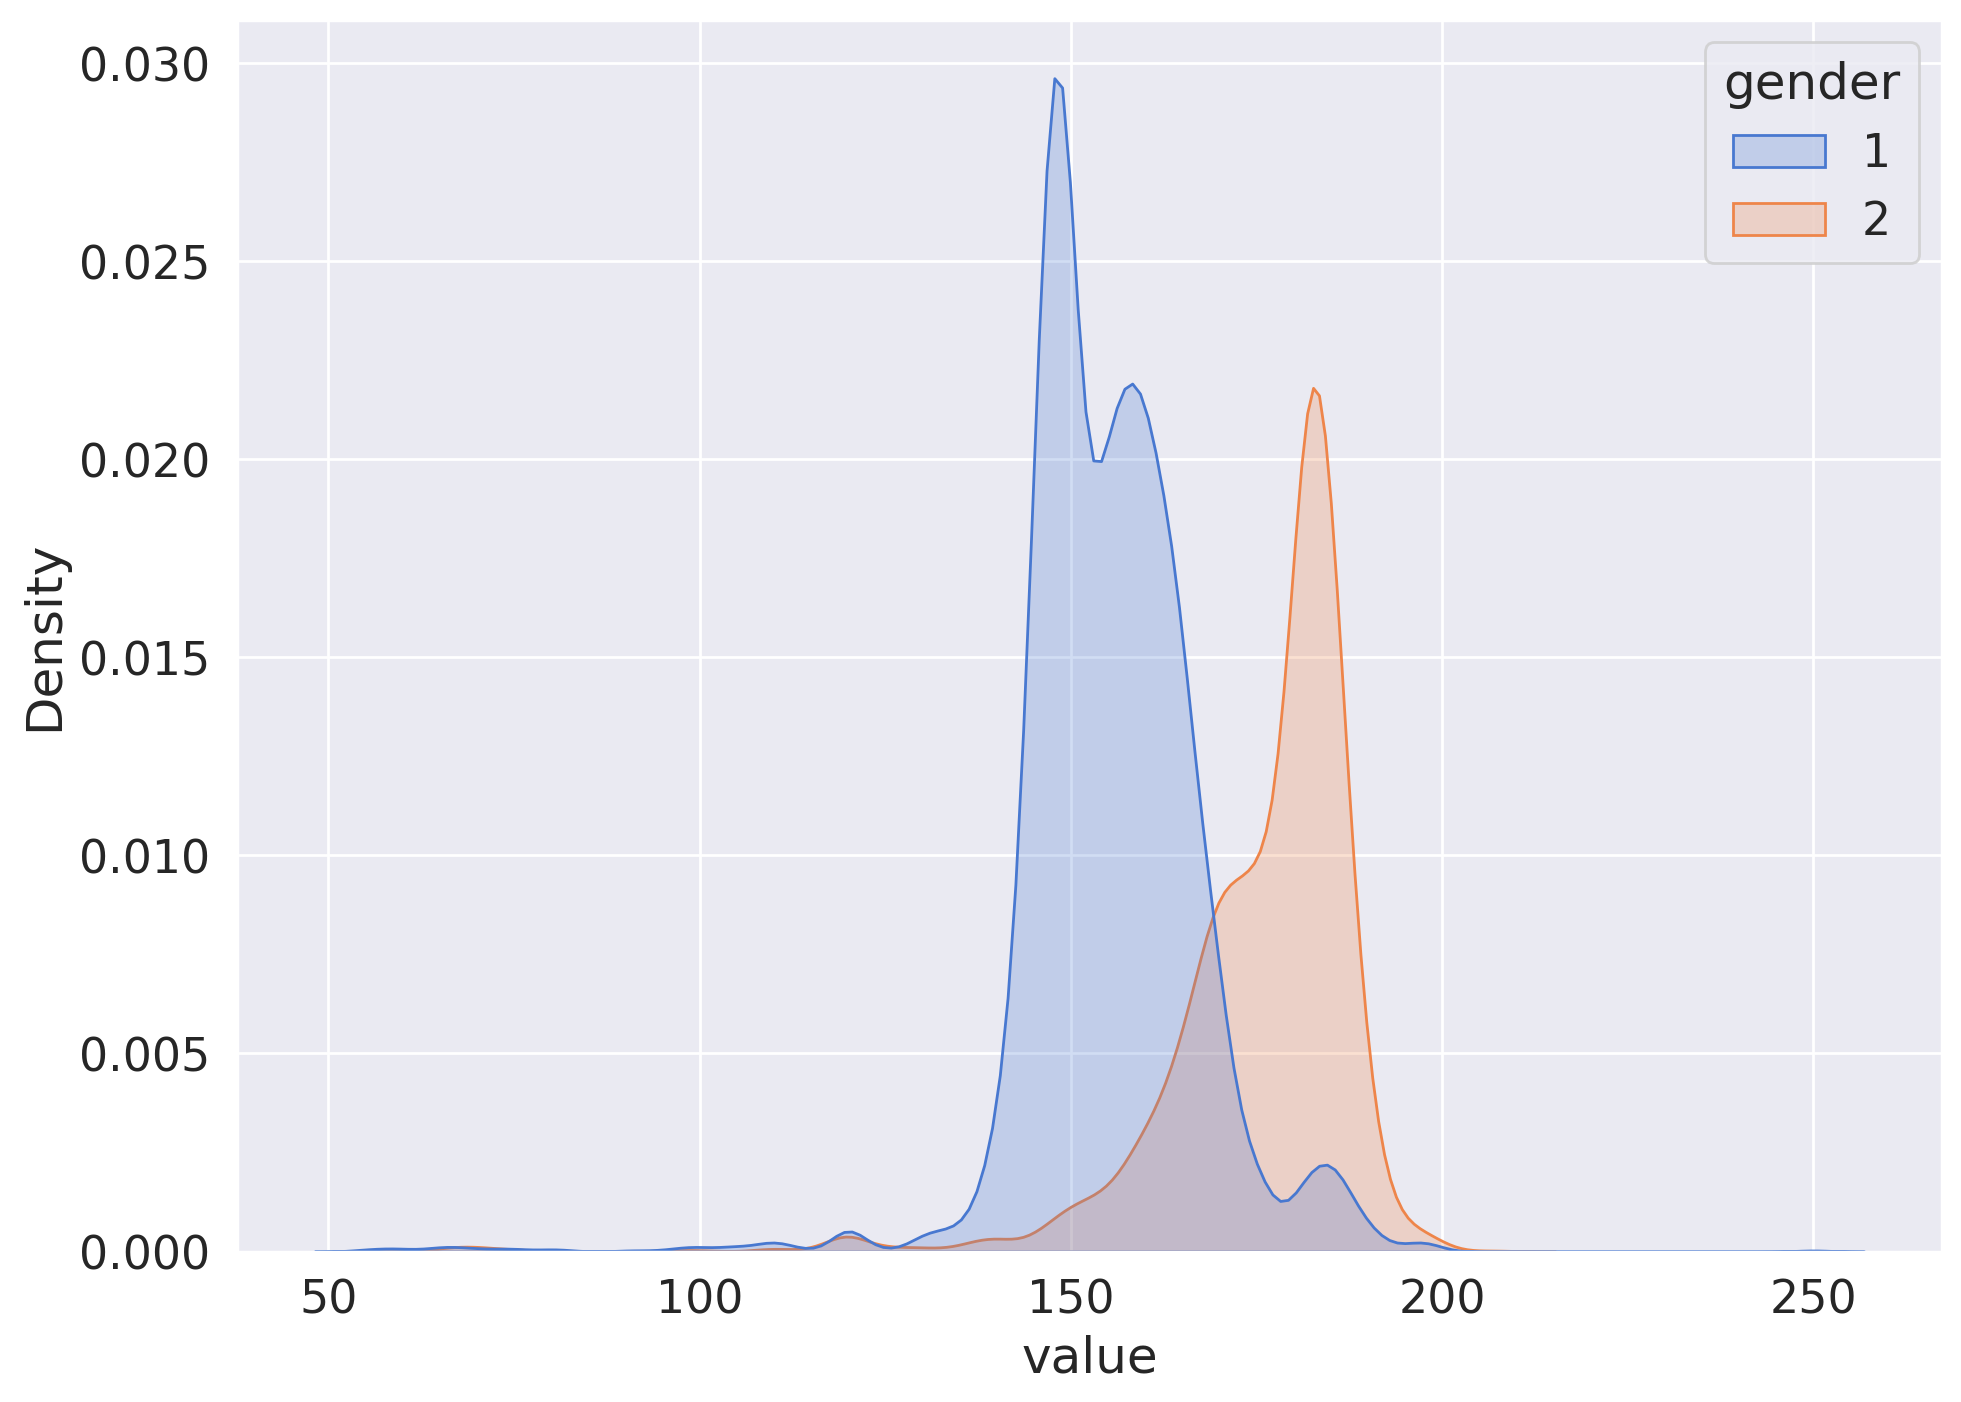

In [ ]:
sns.kdeplot(data=df_melt, x="value", hue="gender", fill=True, palette="muted")

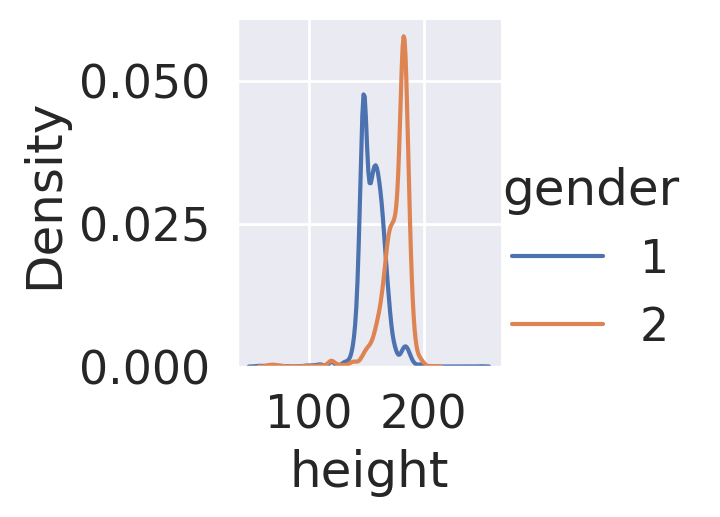

In [ ]:
sns.FacetGrid(df, hue="gender").map(sns.kdeplot, "height").add_legend();

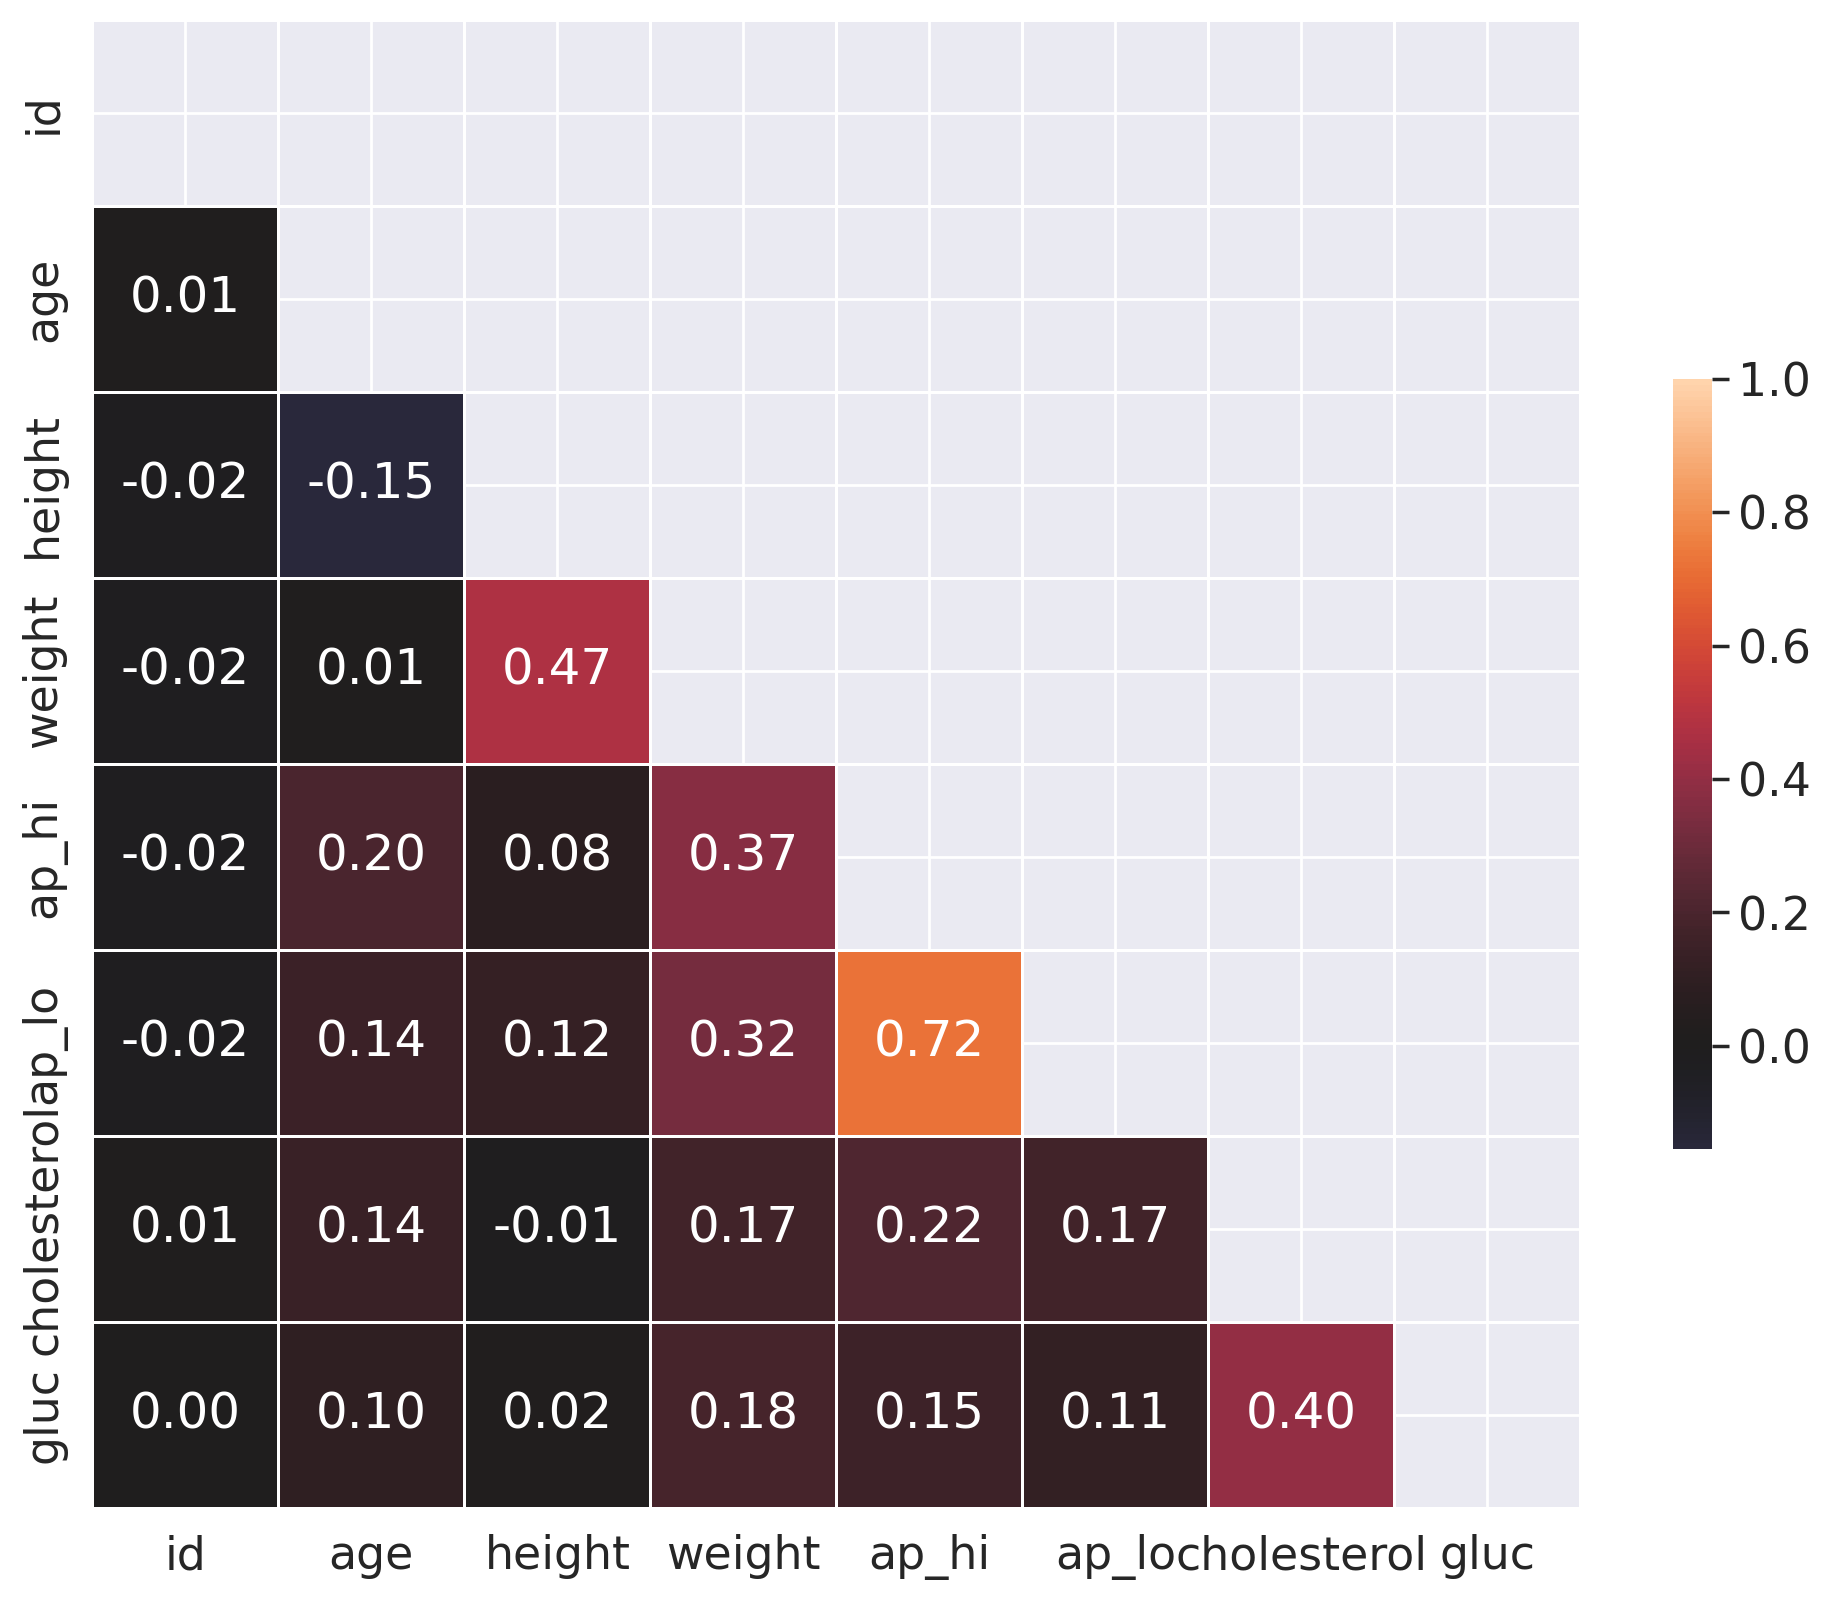

In [ ]:
#Q2.3
corr = df[
    ["id", "age", "height", "weight", "ap_hi", "ap_lo", "cholesterol", "gluc"]
].corr(method="spearman")

mask = np.zeros_like(corr, dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(12, 10))

sns.heatmap(
    corr,
    mask=mask,
    vmax=1,
    center=0,
    annot=True,
    fmt=".2f",
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.5},
);

<Axes: xlabel='age_years', ylabel='count'>

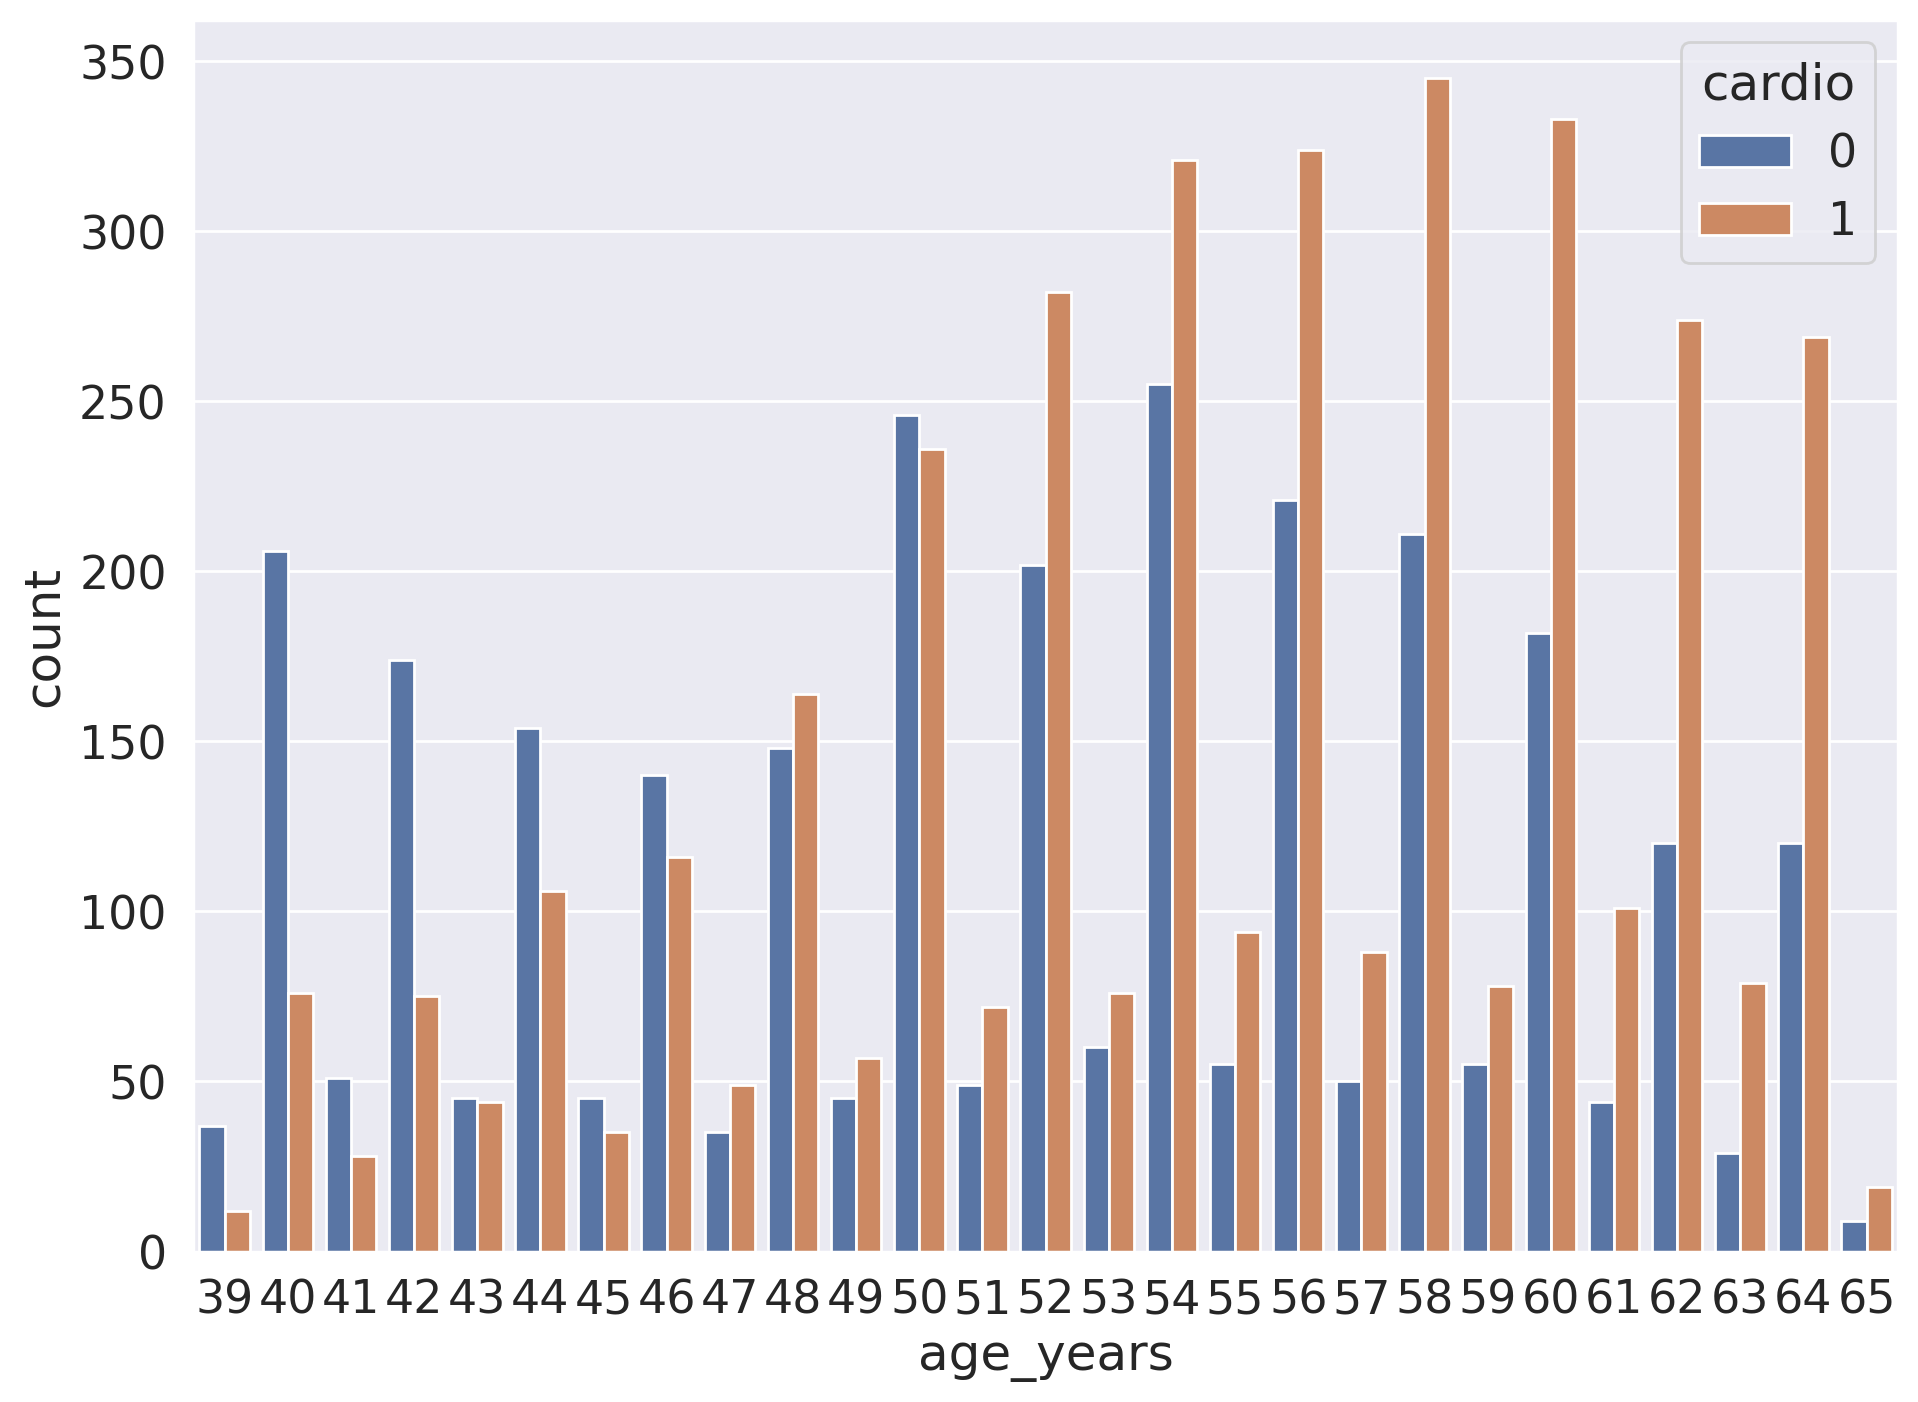

In [ ]:
#Q2.4
sns.countplot(data=df, x="age_years", hue="cardio")